## Learning Pytorch using FMNIST Dataset

### Importing torch and torchvision packages 

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

### Dataset and DataLoader
Loading and transforming the dataset

In [5]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [7]:
len(train_set)

60000

In [8]:
train_set.train_labels

C:\Users\muhammad.tariq\.conda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### Looking a sample (image, label) in a dataset

In [10]:
sample = next(iter(train_set))

In [11]:
len(sample)

2

In [12]:
type(sample)

tuple

In [13]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

label =  9


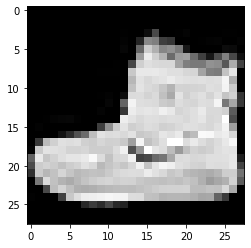

In [14]:
plt.imshow(image.squeeze(), cmap= 'gray')
print('label = ',label)

### Looking and visualizing a batch 

In [15]:
batch = next(iter(train_loader))

In [16]:
len(batch)

2

In [17]:
type(batch)

list

In [18]:
images, labels = batch

labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


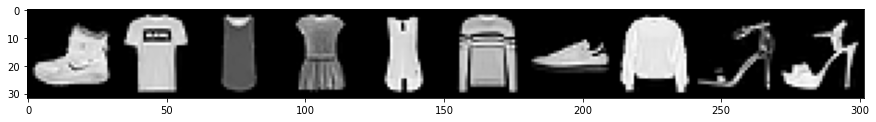

In [19]:
grid = torchvision.utils.make_grid(images,nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels: ', labels)

### Again reloading (no batches) and visualizing with labels 

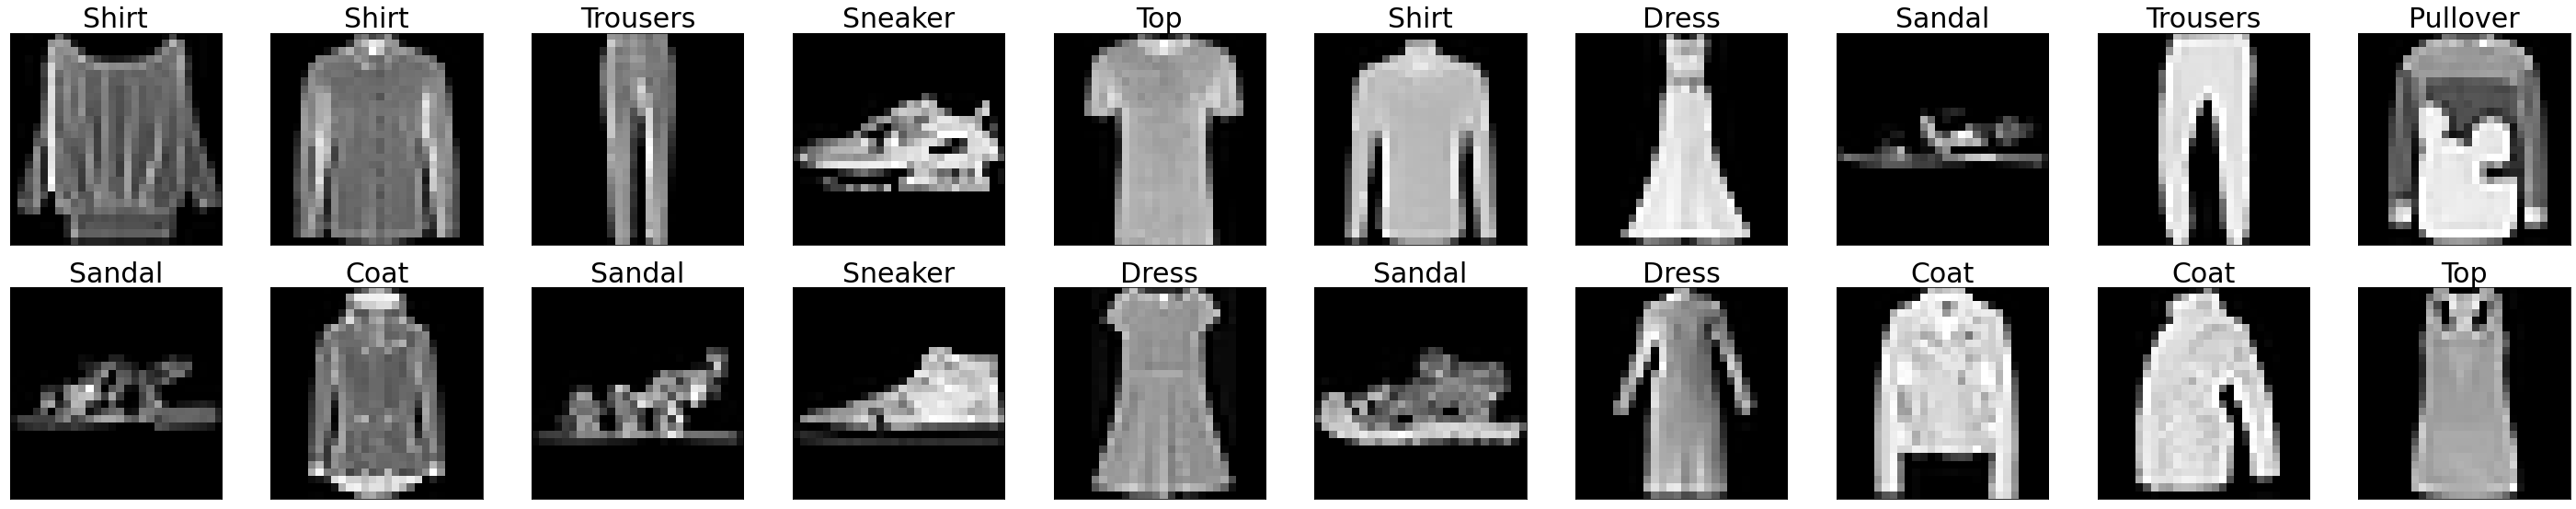

In [20]:
no_of_images_toplot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

mapping = {
     0:'Top', 1:'Trousers', 2:'Pullover', 3:'Dress', 4:'Coat'
    ,5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'
}

plt.figure(figsize=(50,50))

for i,batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    fig = plt.imshow(image.reshape(28,28), cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(mapping[label.item()],fontsize=30)
    if (i >= no_of_images_toplot): break
plt.show()

In [1]:
print("Done!")

Done!
